In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle


In [2]:
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")

In [3]:
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')

In [4]:
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')

In [5]:
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00004-Master.xlsx')

In [6]:

exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)

['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Surface Area', 'Filter0', 'Filter1', 'Filter2', 'Filter3', 'Filter4',
       'Filter5', 'Filter6', 'L/W Ratio', 'W/L Ratio', 'W/T Ratio',
       'T/W Ratio', 'CHull Surface Area', 'Sieve', 'Ellipticity',
       'Fiber Length', 'Fiber Width'],

In [ ]:
# exp_1.groupby(['Id'])['Id'].count()
# exp_1[exp_1['Id'] == 1]
# #Dropping Id column since it's not relevant

# exp_1.groupby(['Filter0']).count()
# exp_2.groupby(['Filter0']).count()
# exp_3.groupby(['Filter0']).count()

# exp_1.groupby(['Filter1']).count()
# exp_2.groupby(['Filter1']).count()
# exp_3.groupby(['Filter1']).count()

# exp_1.groupby(['Filter2']).count()
# exp_2.groupby(['Filter2']).count()
# exp_3.groupby(['Filter2']).count()

# exp_1.groupby(['Filter3']).count()
# exp_2.groupby(['Filter3']).count()
# exp_3.groupby(['Filter3']).count()


# exp_1.groupby(['Filter4']).count()
# exp_2.groupby(['Filter4']).count()
# exp_3.groupby(['Filter4']).count()

# exp_1.groupby(['Filter5']).count()
# exp_2.groupby(['Filter5']).count()
# exp_3.groupby(['Filter5']).count()

# exp_1.groupby(['Filter6']).count()
# exp_2.groupby(['Filter6']).count()
# exp_3.groupby(['Filter6']).count()

#All filters contain reject for all filter columns, they are getting dropped

# exp_1.groupby(['hash']).count()
# exp_2.groupby(['hash']).count()
# exp_3.groupby(['hash']).count()
# Dropping hash, all values are 0

#Img Id doesn't seem to provide good values

exp_5.columns

Index(['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Transparency', 'Curvature', 'Surface Area', 'Filter0', 'Filter1',
       'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'L/W Ratio',
       'W/L Ratio', 'W/T Ratio', 'T/W Ratio', 'CHull Surface Area', 'Sieve',
       'Angularity', 'Ellipticity', 'Fiber Length', 'Fiber Width'],
      dtype='object')

In [7]:
not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
filtered = [x for x in exp_1.columns if x not in not_included]



exp_1_filtered = exp_1[filtered]
exp_2_filtered = exp_2[filtered]
exp_3_filtered = exp_3[filtered]
exp_4_filtered = exp_4[filtered]
exp_5_filtered = exp_5[filtered]

exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

C:\Users\18595\AppData\Local\Temp\ipykernel_3860\4217849102.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_1_filtered['Production Stage'] = 0
C:\Users\18595\AppData\Local\Temp\ipykernel_3860\4217849102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_2_filtered['Production Stage'] = 1
C:\Users\18595\AppData\Local\Temp\ipykernel_3860\4217849102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [8]:
r1, c1 = exp_1_filtered.shape
r2, c2 = exp_2_filtered.shape
r3, c3  = exp_3_filtered.shape
data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
data
data = data.merge(exp_3_filtered, how = 'outer')
data = data.merge(exp_4_filtered, how = 'outer')
data = data.merge(exp_5_filtered, how='outer')

c:\Users\18595\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\18595\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\18595\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\18595\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when

<AxesSubplot:>

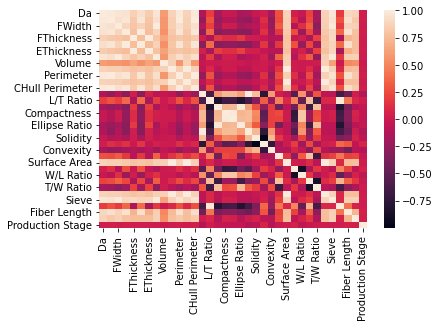

In [9]:
import seaborn as sns

for x in data.columns: 
    data[x] = pd.to_numeric(data[x])

sns.heatmap(data.corr())

In [10]:
data.corr()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Ellipticity,Fiber Length,Fiber Width,Production Stage
Da,1.000000,0.982917,0.967253,0.945612,0.852377,0.934297,0.842265,0.966564,0.595067,0.874640,...,0.035328,-0.020992,0.215468,-0.174295,0.874672,0.974933,0.184432,0.891623,0.868967,0.025562
Dp,0.982917,1.000000,0.944521,0.970804,0.818927,0.962609,0.803553,0.937438,0.578027,0.851502,...,0.124814,-0.100390,0.243147,-0.197746,0.857939,0.947739,0.274048,0.943914,0.818501,0.039007
FWidth,0.967253,0.944521,1.000000,0.890175,0.797799,0.874828,0.786337,0.996353,0.576850,0.847807,...,-0.110002,0.119395,0.331579,-0.281676,0.849628,0.981314,0.183505,0.868512,0.852865,0.013860
FLength,0.945612,0.970804,0.890175,1.000000,0.774123,0.995203,0.759229,0.880531,0.552219,0.813478,...,0.253779,-0.231416,0.234307,-0.198915,0.818726,0.893947,0.356468,0.948179,0.782020,0.034796
FThickness,0.852377,0.818927,0.797799,0.774123,1.000000,0.761780,0.996155,0.796825,0.634103,0.782073,...,-0.017292,0.030154,-0.161092,0.197591,0.785774,0.898899,-0.155952,0.703865,0.763509,0.019973
ELength,0.934297,0.962609,0.874828,0.995203,0.761780,1.000000,0.746534,0.864140,0.544124,0.802435,...,0.272210,-0.247705,0.231363,-0.196746,0.808248,0.878856,0.378872,0.944560,0.765046,0.030728
EThickness,0.842265,0.803553,0.786337,0.759229,0.996155,0.746534,1.000000,0.786618,0.629448,0.774863,...,-0.025950,0.039658,-0.172312,0.209147,0.776903,0.889343,-0.177171,0.684410,0.761428,0.016485
EWidth,0.966564,0.937438,0.996353,0.880531,0.796825,0.864140,0.786618,1.000000,0.573511,0.848690,...,-0.119859,0.131356,0.320246,-0.272216,0.848485,0.978354,0.164772,0.851051,0.854947,0.010461
Volume,0.595067,0.578027,0.576850,0.552219,0.634103,0.544124,0.629448,0.573511,1.000000,0.859350,...,0.004432,-0.002944,0.003278,0.008028,0.863338,0.621565,-0.000770,0.505980,0.535167,-0.001783
Area,0.874640,0.851502,0.847807,0.813478,0.782073,0.802435,0.774863,0.848690,0.859350,1.000000,...,0.011402,-0.002452,0.102594,-0.073410,0.997772,0.865694,0.078515,0.755244,0.770539,0.010128


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[filtered],
    data['Production Stage'],
    test_size=0.1,
    stratify= data['Production Stage'],
    random_state=44)

y_train.groupby(y_train).count()
y_test.groupby(y_test).count()



Production Stage
0    4857
1    4969
2    1482
3    3668
4    3668
Name: Production Stage, dtype: int64

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.model_selection import GridSearchCV

In [12]:
model = KNeighborsClassifier(n_neighbors=5, weights= 'distance', p = 2, leaf_size= 15, algorithm='auto')
scaled_data = scale(data[filtered])
model.fit(data[filtered], data["Production Stage"])
labels = data['Production Stage']

random = data.sample(frac = 1)

one_hundred = random[:10000]

predictions = model.predict(one_hundred[filtered])

total = 0
correct = 0

In [ ]:
from sklearn.pipeline import Pipeline
model = KNeighborsClassifier(n_neighbors=5, weights= 'distance')
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])

params = [{ 'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [5,10,15,20,25,30,35,40],
            }]

search = GridSearchCV(model, 
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 5)

search.fit(X_train,y_train)
print(search.best_params_)

print("score: {}".format(search.score(X_train, y_train)))


In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Accuracy score:',accuracy_score(one_hundred['Production Stage'], predictions))
print('Pecision score:', precision_score(one_hundred['Production Stage'], predictions, average='macro'))


Accuracy score: 0.8051
Pecision score: 0.7012414492019255


c:\Users\18595\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


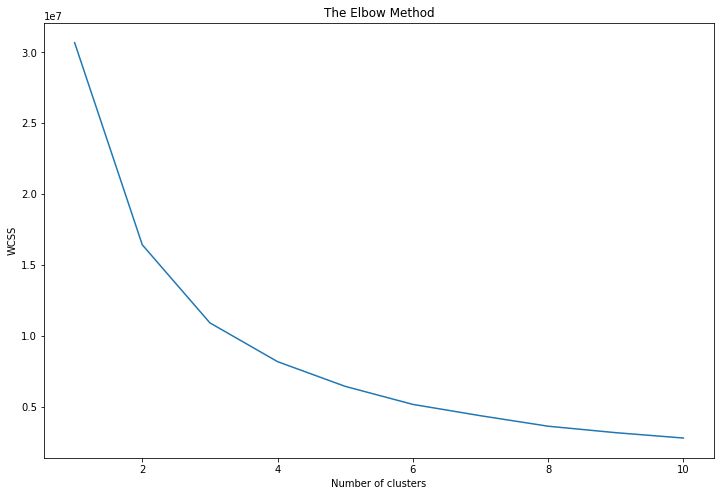

In [ ]:
# find the appropriate cluster number
plt.figure(figsize=(12, 8))
from sklearn.cluster import KMeans
wcss = []
kmeans_test = data[filtered]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(kmeans_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# clustering  inertia 
# 3:3686562.68222830 4:3114351.931722543 5: 2793050.1449603382 6:2543758.110064531 7:

model = KMeans(n_clusters= 5, random_state= 0, max_iter= 45 )
model.fit(scale(data[filtered]))

cluster = model.predict([scale(data[filtered])[0]])[0]

two_hundred = random[:1000]

predictions = model.predict(two_hundred[filtered])

c:\Users\18595\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [65]:
print('Accuracy score:',accuracy_score(two_hundred['Production Stage'], predictions))
print(precision_score(two_hundred['Production Stage'], predictions, average='macro'))

predictions

NameError: name 'two_hundred' is not defined

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.pipeline import Pipeline

In [ ]:
xgb_classifier = xgb.XGBClassifier(
    use_label_encoder= False
)       

xgb_classifier.fit(X_train, y_train)

bruh.fit(X_train, y_train)

predictions = bruh.predict(X_test)

print("Accuracy of Model::",accuracy_score(y_test,predictions))


c:\Users\18595\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:34:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\18595\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:57:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Model:: 0.3397875992276336


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

GBModel = GradientBoostingClassifier(
                                    n_estimators=100, 
                                    learning_rate = .30 , 
                                    max_depth = 3, 
                                    max_features= 'auto',
                                    criterion= 'mse',
                                    loss = 'deviance'
                                    )


GBModel.fit(scale(data[filtered].values), data["Production Stage"])

# cluster = GBModel.predict([scale(data[filtered].values)[0]])[0]

random = data.sample(frac = 1)

ten_thousand = random[:10000]

# predictions = model.predict(two_hundred[filtered])

predictionsGB = GBModel.predict(ten_thousand[filtered])

print('Accuracy score:',accuracy_score(ten_thousand['Production Stage'], predictionsGB))

In [ ]:
from sklearn.pipeline import Pipeline
gbc_pipe = Pipeline([('GBC', GradientBoostingClassifier())])

params = [{ 'max_depth': [ 1, 2, 3, 4, 5],
            'learning_rate': [.01, .10, .20, .30, .40, .50],
            'n_estimators': [50, 150, 250, 350, 450,],
            'loss': ['log_loss', 'deviance', 'exponential'],
            'criterion': ['friedman_mse', 'squared_error', 'mse']
            }]

search = GridSearchCV(GBModel, 
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 5)

search.fit(X_train,y_train)
print(search.best_params_)

print("score: {}".format(search.score(X_train, y_train)))


In [18]:
GBModel.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
model_file = 'my_regression.pkl'

with open(model_file, 'wb') as output:
  pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)